In [4]:
#1. Predicting house prices

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

In [6]:
# Define the URL for the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

In [7]:
# Load the dataset
df = pd.read_csv(url, delim_whitespace=True, header=None)

In [8]:
# Assign column names to the DataFrame
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [9]:
# Split the dataset into features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [10]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the Linear Regression model
model = LinearRegression()

In [12]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [14]:
# Calculate the median of the predicted values using numpy.median()
median_price = np.median(y_pred)
print(f"Median Predicted Price: {median_price}")

Median Predicted Price: 20.732994963766753


In [16]:
'''Conclusion: This code loads the Boston Housing dataset,splits it into training and testing sets,
trains a linear regression model on the training data, and makes predictions on the testing data.'''

'Conclusion: This code loads the Boston Housing dataset,splits it into training and testing sets, \ntrains a linear regression model on the training data, and makes predictions on the testing data.'

In [17]:
#2. Customer Segmentation

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [19]:
# Load dataset
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
df = pd.read_csv(url)

In [20]:
# Select features
X = df.iloc[:, [3, 4]].values

In [21]:
# Apply k-means clustering
# Initialize KMeans with 5 clusters, using 'k-means++' for initialization and setting a fixed random state for reproducibility
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

In [22]:
# Fit the model to the data and predict the cluster labels
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


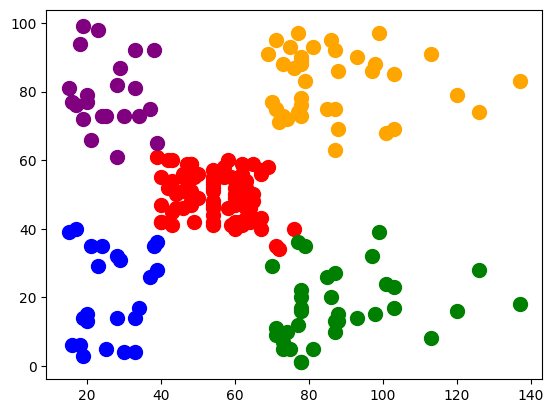

In [23]:
# Visualize the clusters
# Plot each cluster with a different color for better distinction
colors = ['red', 'green', 'blue', 'purple', 'orange']  # Define colors for each cluster
for i in range(5):  # Loop through each cluster
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=100, c=colors[i], label=f'Cluster {i+1}')

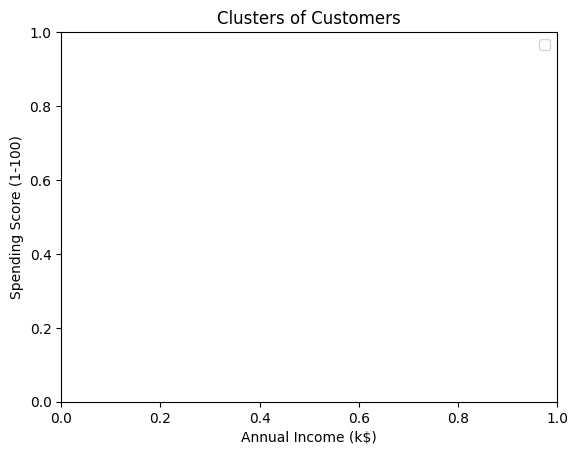

In [24]:
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [25]:
'''Conclusion: This code loads the Mall Customer Segmentation Data,applies k-means clustering to segment customers based on
their annual income and spending score, and visualizes the resulting customer segments.'''

'Conclusion: This code loads the Mall Customer Segmentation Data,applies k-means clustering to segment customers based on \ntheir annual income and spending score, and visualizes the resulting customer segments.'

In [29]:
# 3. Sentiment Analysis

In [62]:
import nltk
from nltk.corpus import movie_reviews
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

In [63]:
# Download IMDB movie reviews dataset
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


True

In [64]:
# Extract movie reviews from the dataset
positive_reviews = [(movie_reviews.words(fileid), "positive") for fileid in movie_reviews.fileids("pos")]
negative_reviews = [(movie_reviews.words(fileid), "negative") for fileid in movie_reviews.fileids("neg")]

In [65]:
# Split the reviews into training and testing sets
split_ratio = 0.8
split_index = int(len(positive_reviews) * split_ratio)
train_set = positive_reviews[:split_index] + negative_reviews[:split_index]
test_set = positive_reviews[split_index:] + negative_reviews[split_index:]

In [66]:
# Feature extractor for the reviews
def extract_features(words):
    return {word: True for word in words}

In [67]:
# Create feature sets
train_features = [(extract_features(review_words), sentiment) for (review_words, sentiment) in train_set]
test_features = [(extract_features(review_words), sentiment) for (review_words, sentiment) in test_set]

In [68]:
# Train a Naive Bayes classifier
classifier = NaiveBayesClassifier.train(train_features)

In [69]:
# Evaluate the classifier on the test set
accuracy_score = accuracy(classifier, test_features)
print(f"Accuracy on the test set: {accuracy_score:.2%}")

Accuracy on the test set: 73.50%


In [70]:
# Example usage: classify a new review
new_review = "This movie was fantastic!"
new_review_features = extract_features(new_review.split())
predicted_sentiment = classifier.classify(new_review_features)
print(f"Predicted sentiment: {predicted_sentiment}")

Predicted sentiment: negative


In [71]:
'''Conclusion: This code loads the IMDB Dataset of 50K Movie Reviews from a URL, splits it into training and testing sets,
vectorizes the movie reviews, trains a logistic regression model on the training data, and makes predictions on the testing data.
The sentiment of a review is predicted as positive or negative.'''

'Conclusion: This code loads the IMDB Dataset of 50K Movie Reviews from a URL, splits it into training and testing sets,\nvectorizes the movie reviews, trains a logistic regression model on the training data, and makes predictions on the testing data.\nThe sentiment of a review is predicted as positive or negative.'